In [16]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

#Create the path to where your data is stored
path = '/Users/andrewfearney27/Downloads/'  # Update this path

#Read in the European weather data
weather_data = pd.read_csv(path + 'Dataset-weather-prediction-dataset-scaled.csv')
print(weather_data.head())

#Read in the pleasant weather data
pleasantweather = pd.read_csv(path + 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
print(pleasantweather.head())



       DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101 -1.599964           0.660514          -0.02793        0.826097   
1  19600102 -1.599964           0.244897          -0.02793        0.735760   
2  19600103 -1.599964           1.076130          -0.02793        1.277781   
3  19600104 -1.599964          -1.001953          -0.02793        1.458455   
4  19600105 -1.599964           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1 

In [17]:
print(df.columns)
print(pleasantweather.columns)


Index(['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=168)
Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VAL

In [18]:
if 'DATE' in df.columns:
    df = df.drop(['DATE'], axis=1)

if 'DATE' in pleasantweather.columns:
    pleasantweather = pleasantweather.drop(['DATE'], axis=1)


In [19]:
#Q4 Drop columns that are not needed
if 'DATE' in df.columns:
    X = df.drop(['DATE'], axis=1)
else:
    X = df  # In case DATE is already dropped or not present

if 'DATE' in pleasantweather.columns:
    y = pleasantweather.drop(['DATE'], axis=1)
else:
    y = pleasantweather  # In case DATE is already dropped or not present

# Check shapes to ensure correct processing
print(X.shape)
print(y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Convert data to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


(22950, 168)
(22950, 15)
(17212, 168)
(5738, 168)
(17212, 15)
(5738, 15)


Testing k = 1
Testing k = 2
Testing k = 3
Testing k = 4


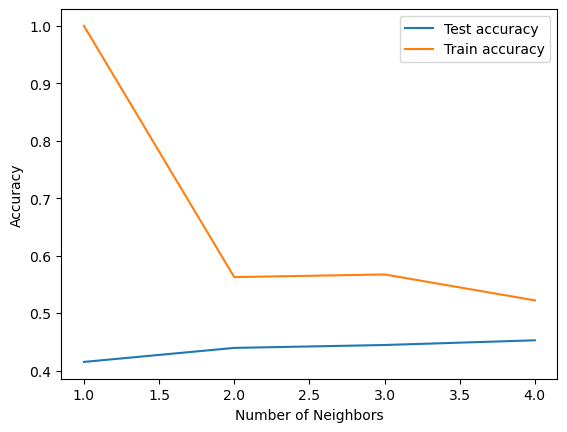

In [25]:
# Define the range of neighbors to test
k_range = np.arange(1, 5)  # Reducing from 60 to 4 or 5 as mentioned

# Initialize accuracy tracking lists
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Train the KNN model with multi-output classifier
for i, k in enumerate(k_range):
    print("Testing k =", k)
    
    # Create the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Wrap it in a MultiOutputClassifier to handle multiple targets
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict using the model
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    
    # Calculate and store accuracy
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

# Plot the results
plt.plot(k_range, test_acc, label='Test accuracy')
plt.plot(k_range, train_acc, label='Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


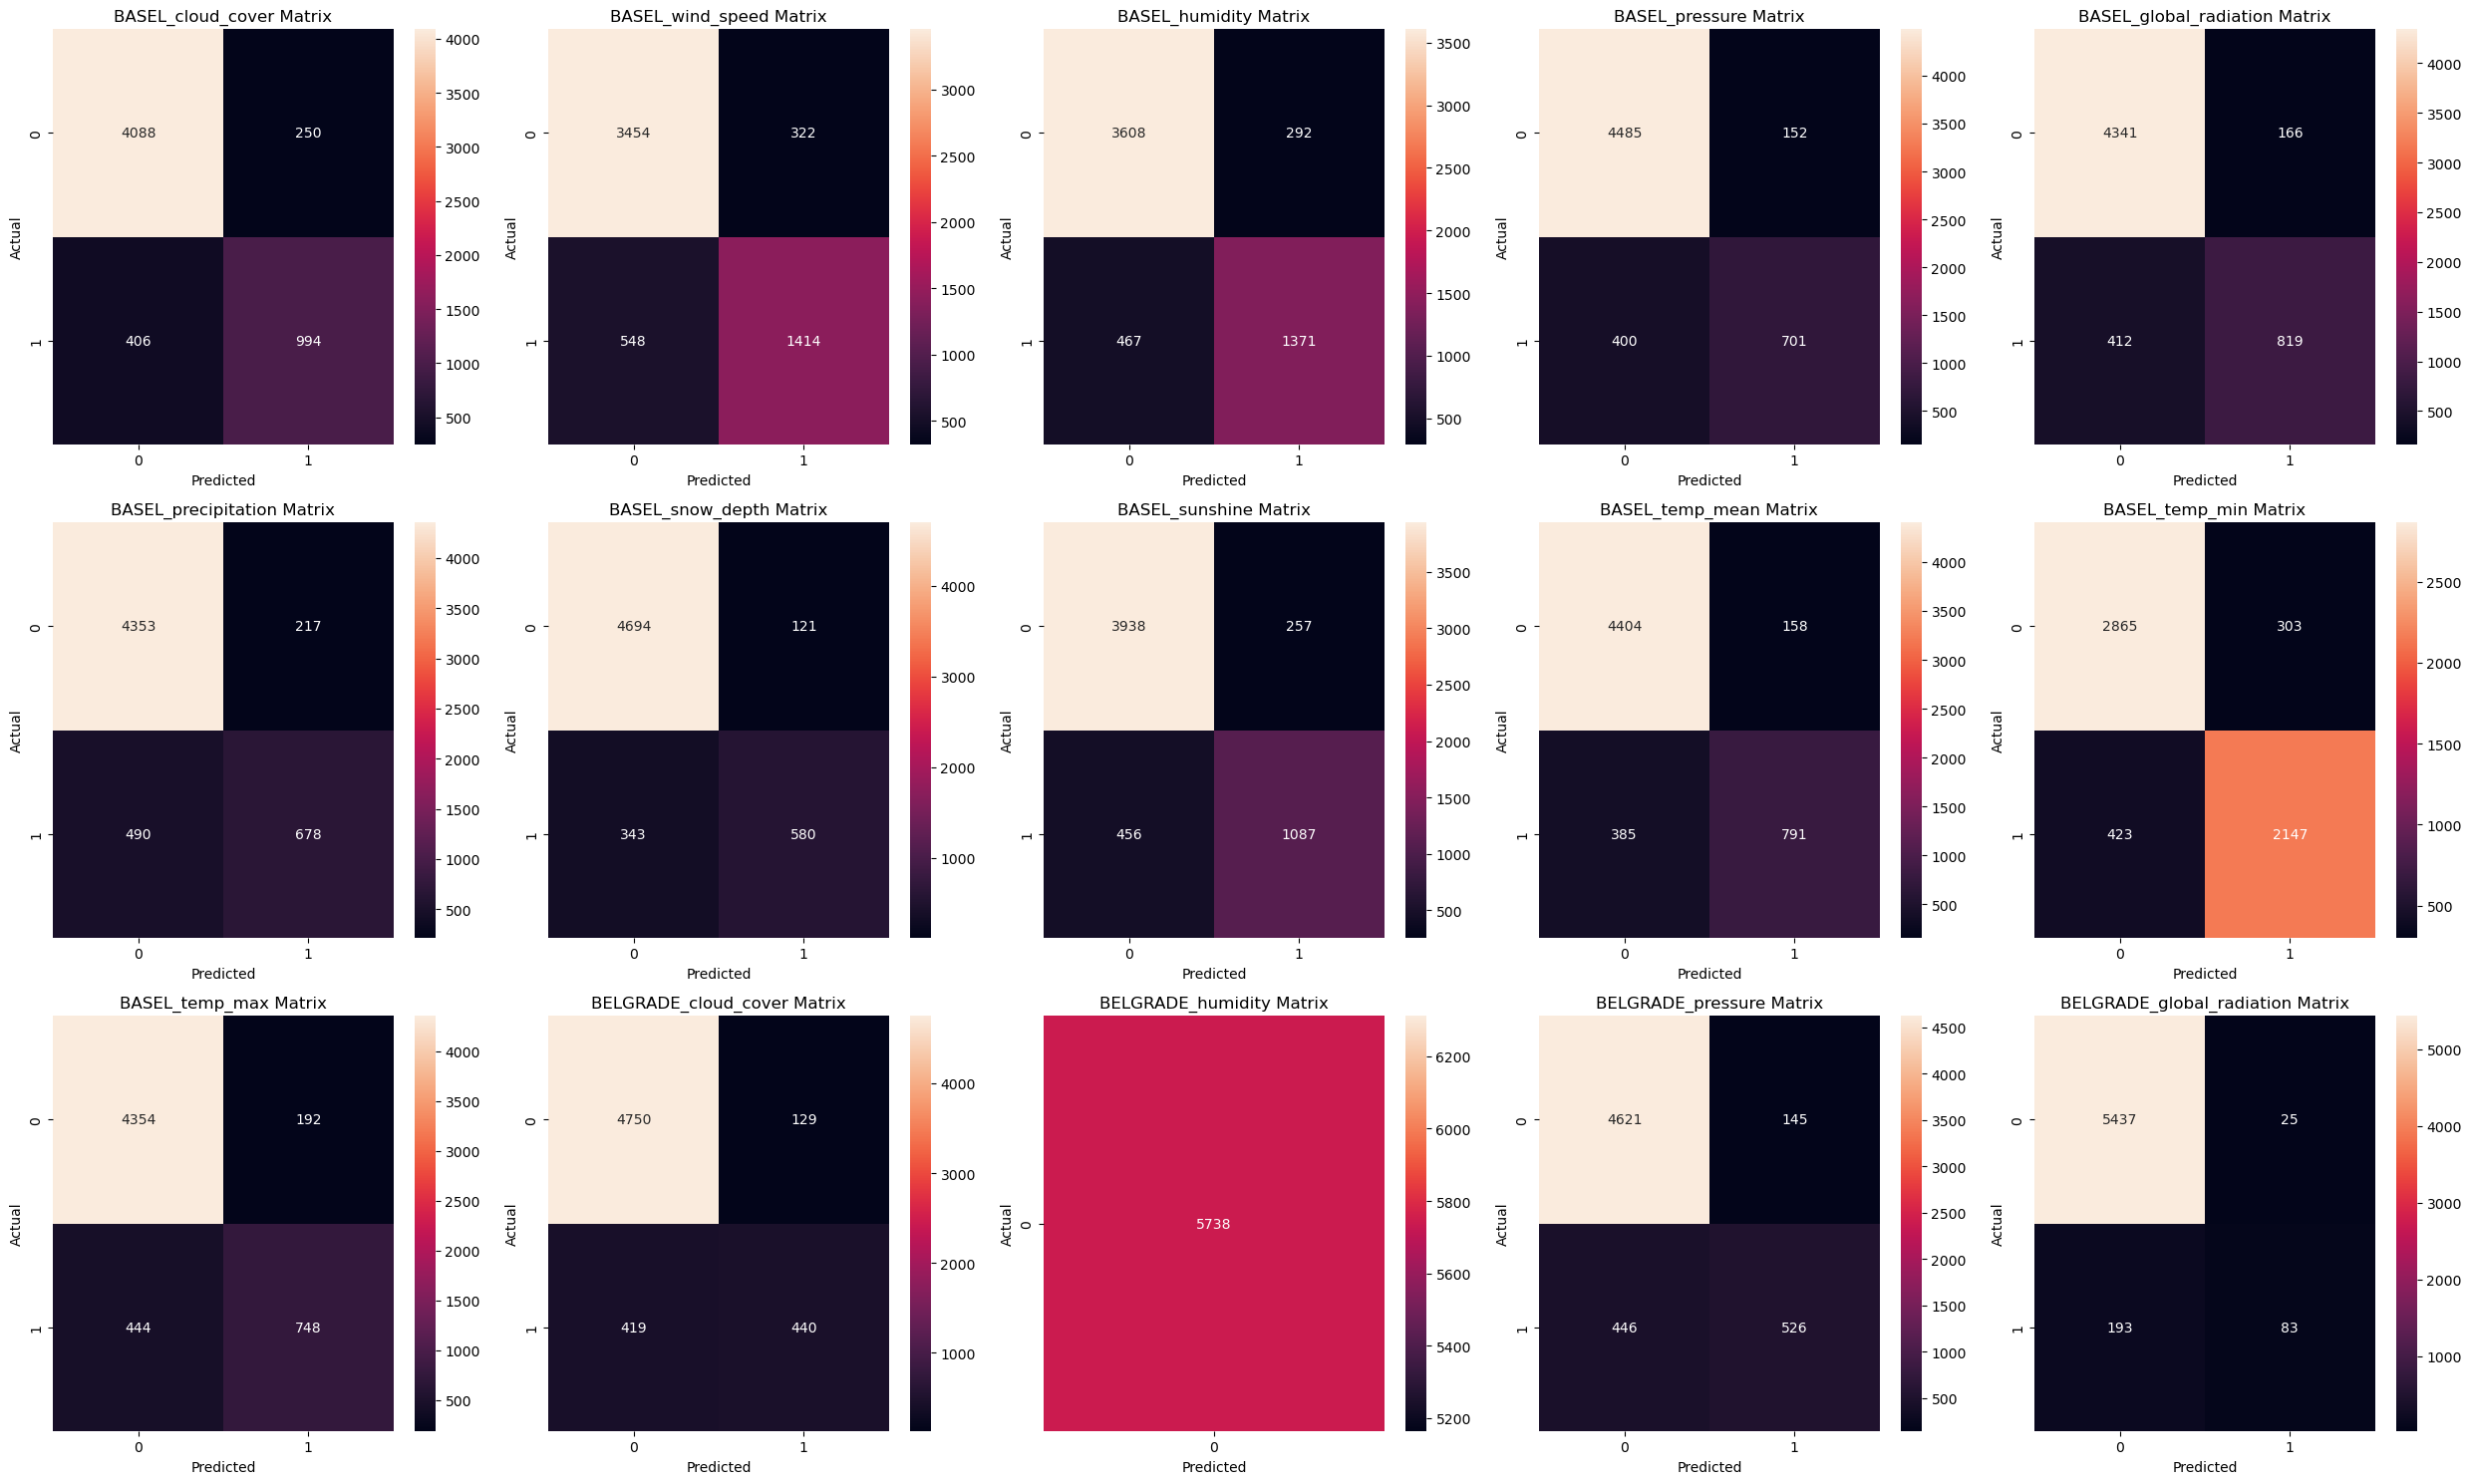

In [26]:
#Q6
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List to store confusion matrices
stations = list(df.columns)  # Adjust this to store your station names

fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # Adjust this for 15 matrices
axes = axes.flatten()  # Flatten axes to iterate easily

for idx, station in enumerate(stations[:15]):  # Limit to 15
    cm = confusion_matrix(y_test[:, idx], y_pred_test[:, idx])  # Generate confusion matrix for each station
    
    sns.heatmap(cm, annot=True, ax=axes[idx], fmt="g")  # Plot matrix in the correct subplot
    axes[idx].set_title(f'{station} Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()
